<a href="https://colab.research.google.com/github/davidnalbandyann/ACA_homework/blob/main/David_Nalbandyan_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, KFold
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("Ecommerce.csv")

Saving Ecommerce.csv to Ecommerce.csv


### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

### Get rid of non-numerical columns of the dataset

In [ ]:
df_numerical=df.select_dtypes(include=["int", "float"])
print(df_numerical.head())

   Avg Session Length  Time on App  Time on Website  Length of Membership  \
0           34.497268    12.655651        39.577668              4.082621   
1           31.926272    11.109461        37.268959              2.664034   
2           33.000915    11.330278        37.110597              4.104543   
3           34.305557    13.717514        36.721283              3.120179   
4           33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092  


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

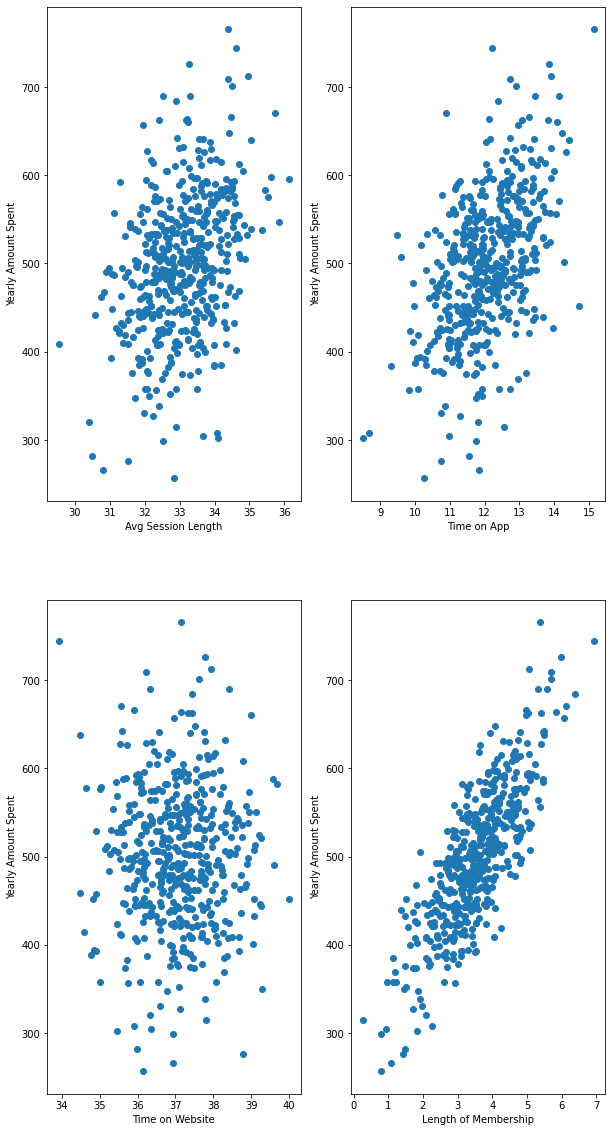

In [ ]:
target=df_numerical['Yearly Amount Spent']
fig, axs=plt.subplots(2,2, figsize=(10, 20))
for i in range(2):
    for j in range(2):
        ax=axs[i, j]
        ax.scatter(df_numerical[(df_numerical.columns[2*i+j])], target)
        ax.set_xlabel(df_numerical.columns[2*i+j])
        ax.set_ylabel("Yearly Amount Spent")
plt.show()

### Leave only one feature that has a linear relationship with the target variable.

In [ ]:
X=df["Yearly Amount Spent"]
Y=df["Length of Membership"]

### Divide the dataset into training and test sets with the ratio 80:20.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope.

In [ ]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """

    #TODO
    x_mean = np.mean(data_vector)
    y_mean = np.mean(response_vector)
    numerator = np.sum((data_vector - x_mean) * (response_vector - y_mean))
    denominator = np.sum((data_vector - x_mean) ** 2)
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean
    return (slope, intercept)

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [ ]:
def plot_fitted_line(b0: float,
                     b1: float,
                     x,
                     y):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    plt.scatter(x, y)
    line_y = b0 + b1 * x
    plt.plot(x, line_y, color='red')
    plt.title("Linear Regression")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.savefig("YOURNAME.png")
    plt.show()
    pass

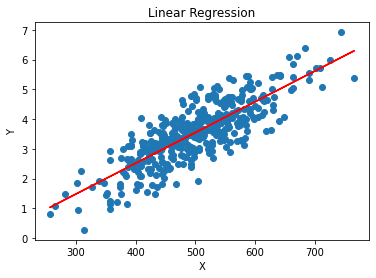

In [ ]:
b1,b0=fit_1d_linear_regression(X_train, y_train)
plot_fitted_line(b0,b1,X_train,y_train)

### Plot example

![image.png](attachment:image.png)

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [ ]:
reg=linear_model.LinearRegression()
X_train1, X_test1=(X_train.values).reshape(-1,1), (X_test.values).reshape(-1,1)
y_train1, y_test1=(y_train.values).reshape(-1,1), (y_test.values).reshape(-1,1)
reg.fit(X_train1, y_train1)
print(reg.coef_, b0)

[[0.01036269]] -1.6339233402395679


### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [ ]:
def predict_1d(x, b1=b1, b0=b0):
    y_pred = b1*x + b0
    return np.array(y_pred)
my_y_pred=predict_1d(X_test1)
y_pred=reg.predict(X_test1)
my_meanae=mean_absolute_error(y_test1, my_y_pred)
meanae=mean_absolute_error(y_test1, y_pred)
my_meanse=mean_squared_error(y_test1, my_y_pred)
meanse=mean_squared_error(y_test1, y_pred)
my_rootmeanse=my_meanse**0.5
rootmeanse=meanse**0.5
myr2=r2_score(y_test1, my_y_pred)
r2=r2_score(y_test1, y_pred)
print(my_meanae, meanae)
print(my_meanse, meanse)
print(my_rootmeanse, rootmeanse)
print(myr2, r2)

0.4703633708321966 0.4703633708321964
0.3303006781916298 0.3303006781916297
0.5747179118416528 0.5747179118416528
0.5555842352382576 0.5555842352382578


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [ ]:
df_numerical_x=df_numerical.drop('Yearly Amount Spent', axis=1)
df_numerical_y=df['Yearly Amount Spent']
X_multiple_features=df_numerical_x.values
Y_multiple_features=df_numerical_y.values
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multiple_features, Y_multiple_features, train_size=0.8, random_state=42)
reg.fit(X_multi_train, y_multi_train)
y_multi_pred=reg.predict(X_multi_test)
meanae_multi=mean_absolute_error(y_multi_test, y_multi_pred)
meanse_multi=mean_squared_error(y_multi_test, y_multi_pred)
rootmeanse_multi=meanse_multi**0.5
r2_multi=r2_score(y_multi_test, y_multi_pred)
print(meanae_multi,meanse_multi,rootmeanse_multi,r2_multi)

8.558441885315263 109.8637411839407 10.481590584636509 0.9778130629184125


### Implement K-fold Cross Validation

In [ ]:
kf=KFold(n_splits=10, shuffle=True)
mse_list=[]
for train1, test1 in kf.split(X_multi_train):
  X_TRAIN, X_TEST=X_multi_train[train1], X_multi_train[test1]
  Y_TRAIN, Y_TEST=y_multi_train[train1], y_multi_train[test1]
  kfmodel=linear_model.LinearRegression()
  kfmodel.fit(X_TRAIN, Y_TRAIN)
  kfpred=kfmodel.predict(X_TEST)
  kfmse=mean_squared_error(kfpred, Y_TEST)
  mse_list.append(kfmse)
print(mse_list)
print(np.mean(mse_list))

[123.32443785828414, 99.80391068686053, 113.1782765695754, 105.43001906452757, 72.3311903924268, 72.49439064033717, 90.1721714159174, 122.5637105548487, 64.41491728270059, 114.90309668512066]
97.8616121150599


### Evaluate model with K-fold

In [ ]:
kf_test_pred=kfmodel.predict(X_multi_test)
print(mean_squared_error(kf_test_pred, y_multi_test))

109.933806884219
